## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [11]:
# Load file
df = pd.read_csv('opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [12]:
# Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [13]:
# Transform the dates into datetime format in pandas
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

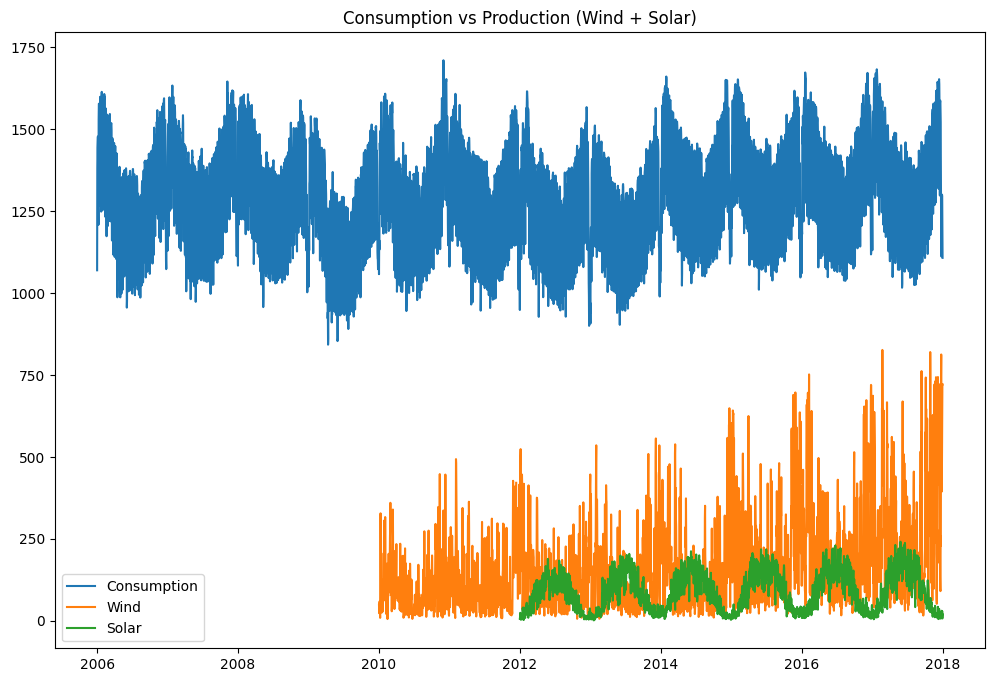

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], label='Consumption')
plt.plot(df['Wind'], label='Wind')
plt.plot(df['Solar'], label='Solar')
plt.legend()
plt.title('Consumption vs Production (Wind + Solar)')
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

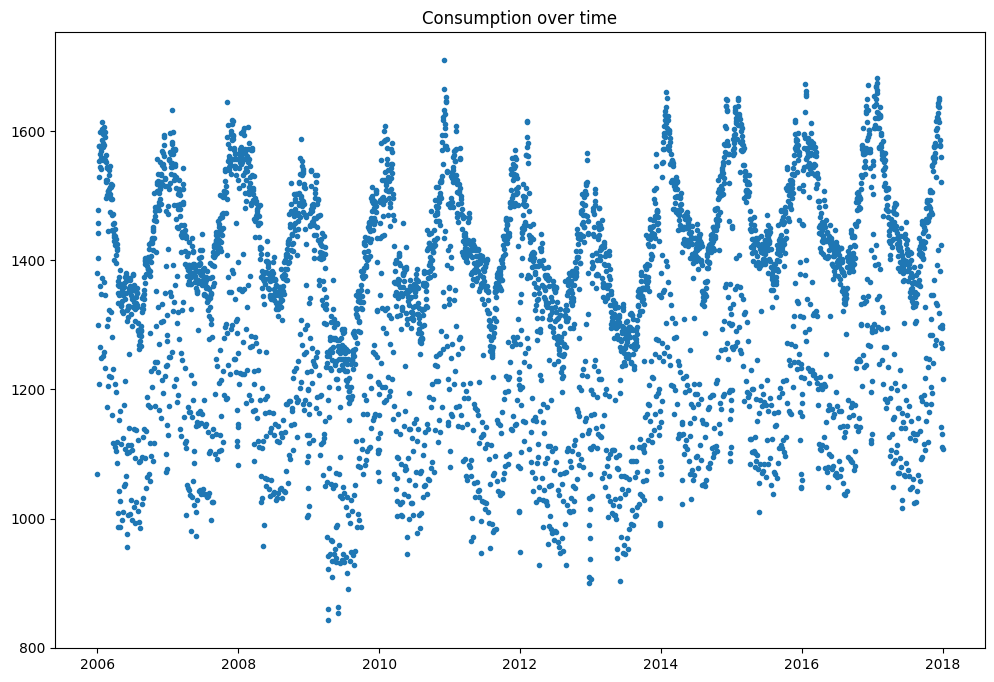

In [19]:
plt.figure(figsize=(12,8))
plt.title('Consumption over time')
plt.plot(df['Consumption'], marker='.', linestyle='None')
plt.show()

And plot the production over time :

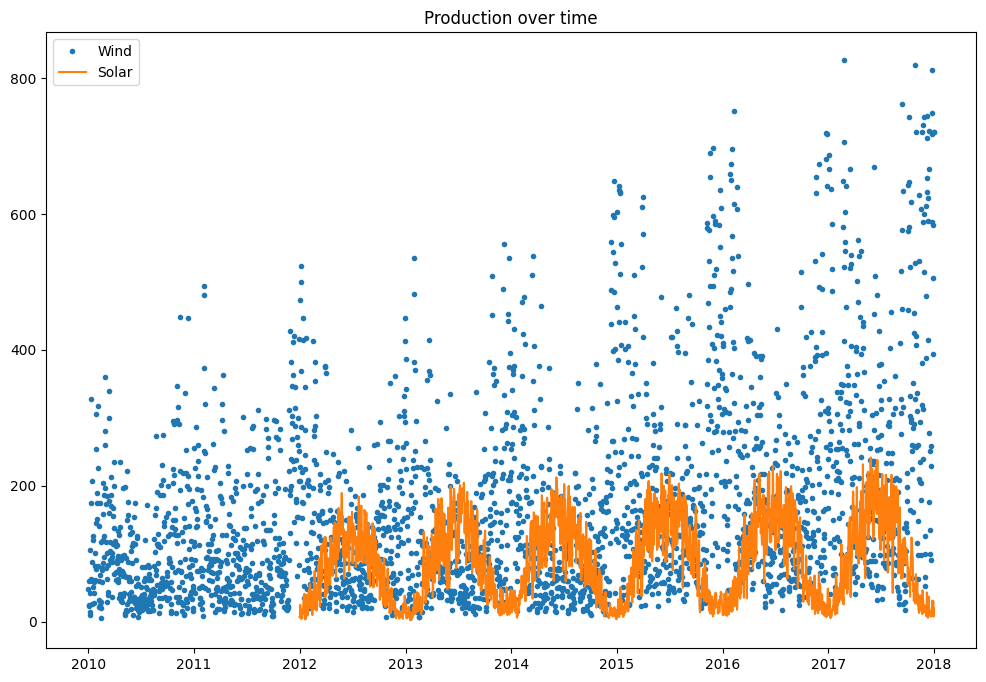

In [22]:
plt.figure(figsize=(12,8))
plt.title('Production over time')
plt.plot(df['Wind'], marker='.', linestyle='None', label='Wind')
plt.plot(df['Solar'], label = 'Solar')
plt.legend()
plt.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

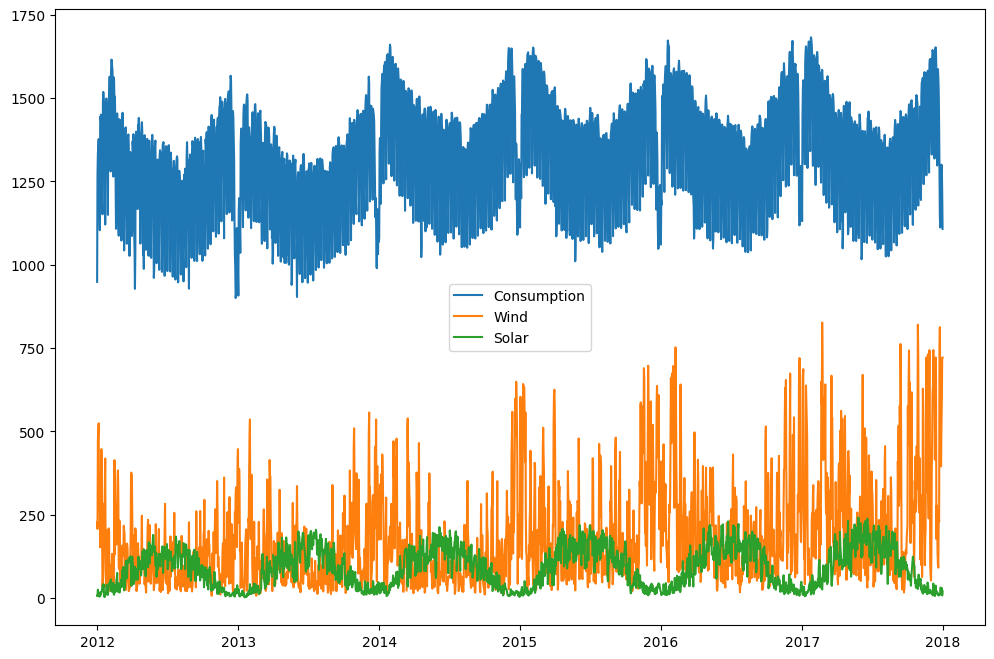

In [27]:
plt.figure(figsize=(12,8))
# plot from 2012 onwards
plt.plot(df.loc['2012':]['Consumption'], label='Consumption')
plt.plot(df.loc['2012':]['Wind'], label='Wind')
plt.plot(df.loc['2012':]['Solar'], label = 'Solar')
plt.legend()
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

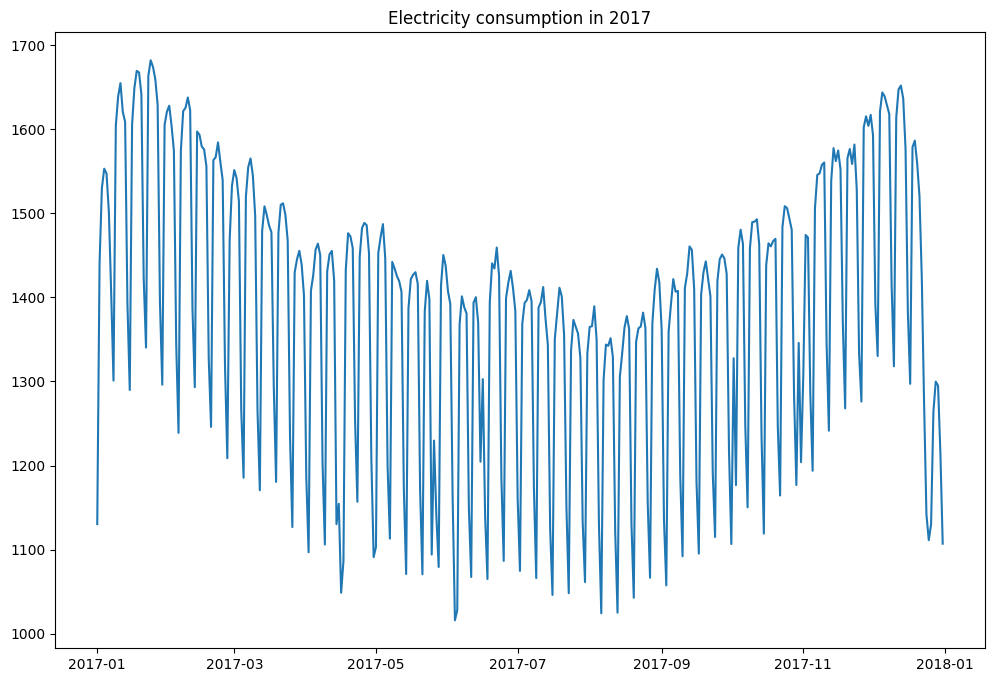

In [28]:
# Plot over the year from 2017-2018
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-01-01':'2018-01-01']['Consumption'], label='Consumption')
plt.title('Electricity consumption in 2017')
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

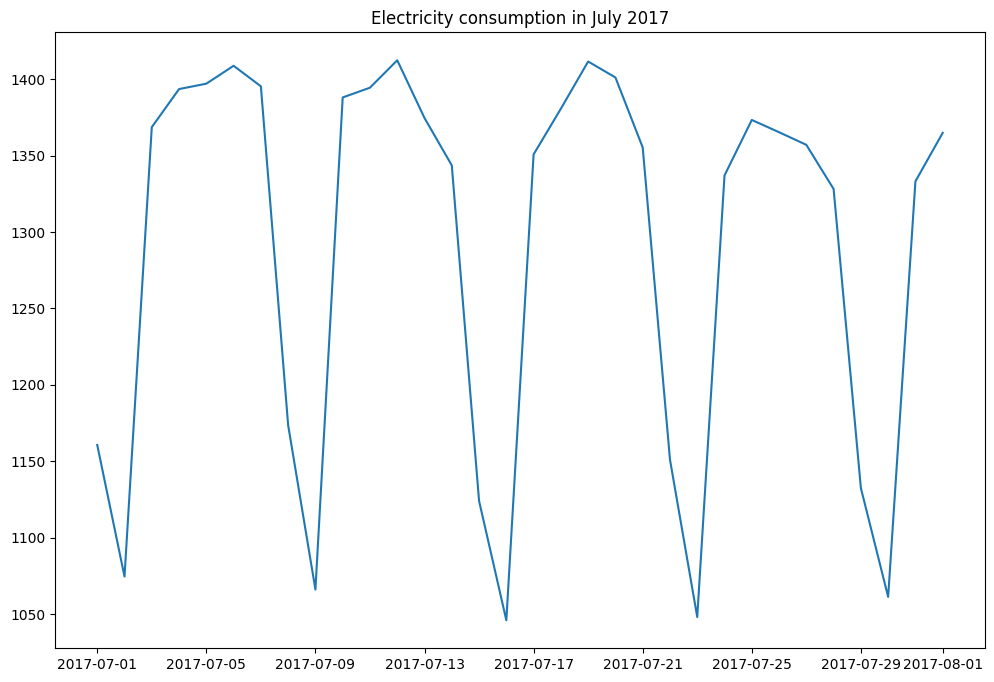

In [29]:
# Plot over a month
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-07-01':'2017-08-01']['Consumption'], label='Consumption')
plt.title('Electricity consumption in July 2017')
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

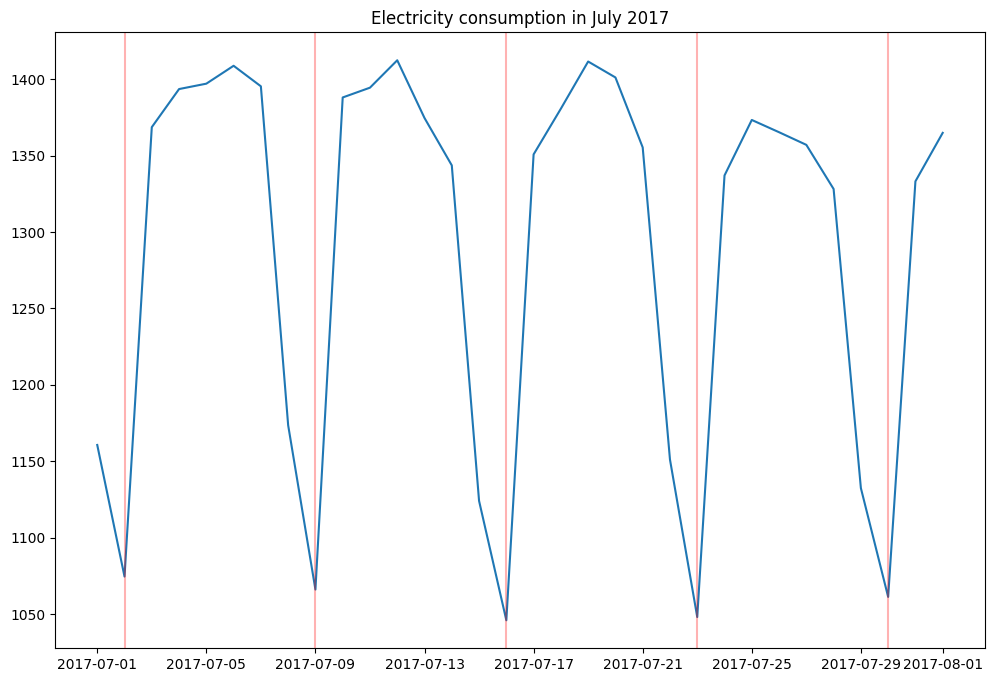

In [41]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-07-01':'2017-08-01']['Consumption'], label='Consumption')
# Add a vertical line for sundays in this month
sundays = pd.date_range(start='2017-07-01', end='2017-08-01', freq='W-SUN')
for sunday in sundays:
    plt.axvline(sunday, color = 'red', alpha=0.3)
plt.title('Electricity consumption in July 2017')
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [42]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = df_2['Date'].dt.year
df_2['month'] = df_2['Date'].dt.month
years = df_2['year'].unique()
print(years)
df_2.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,Weekday,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,6,2006,1
1,2006-01-02,1380.521,NaN,NaN,NaN,0,2006,1
2,2006-01-03,1442.533,NaN,NaN,NaN,1,2006,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2,2006,1
4,2006-01-05,1477.131,NaN,NaN,NaN,3,2006,1


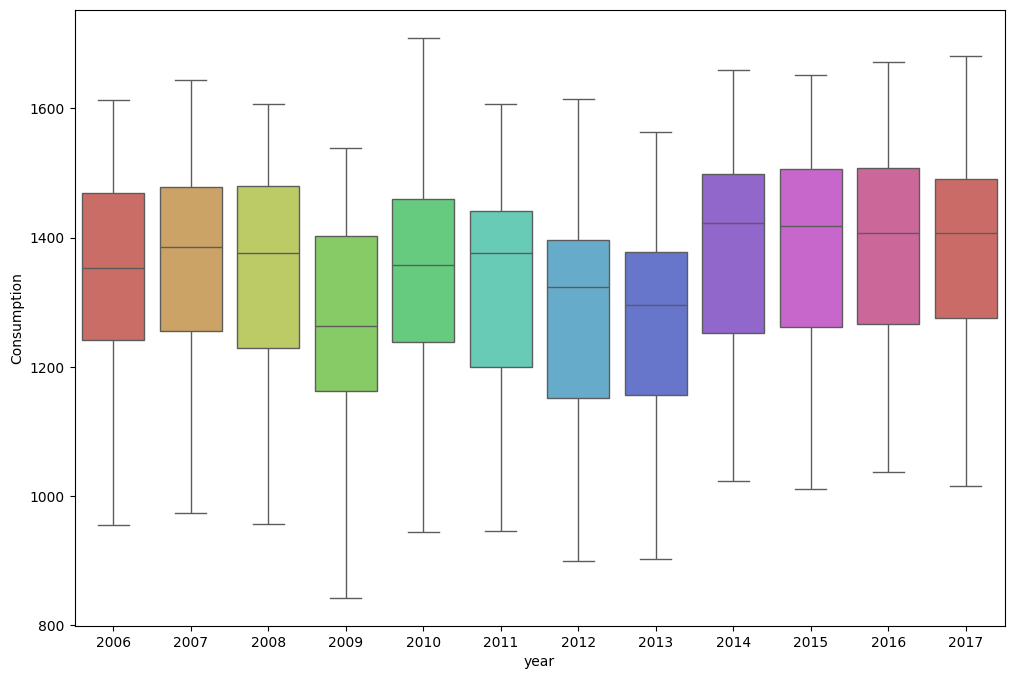

In [50]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data=df_2, x='year', y='Consumption', palette='hls', hue='year', legend=False)
plt.show()

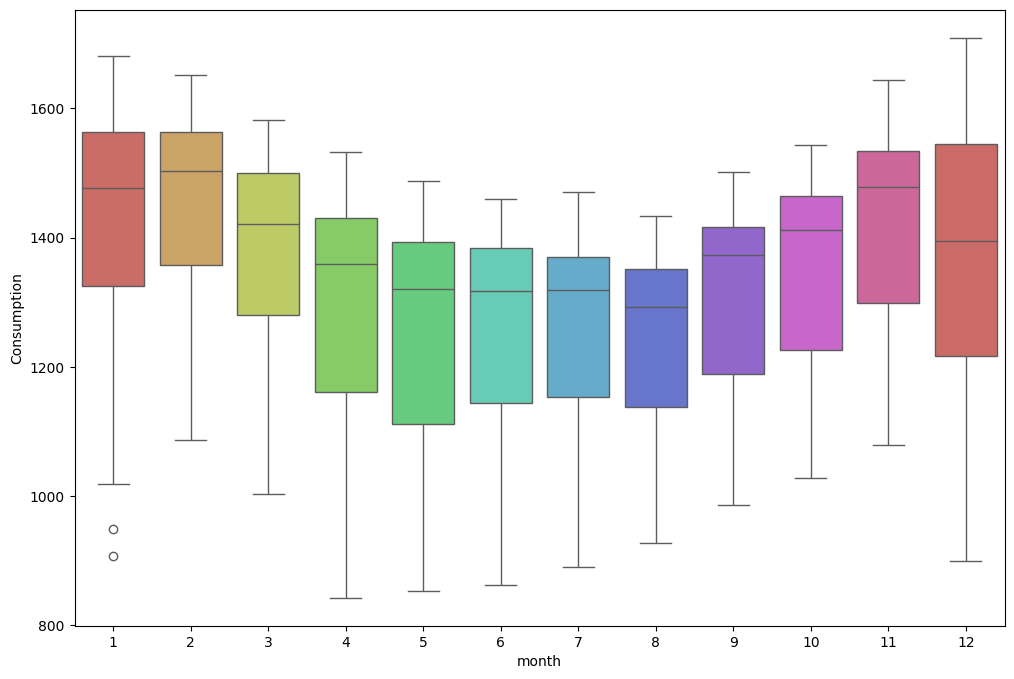

In [52]:
# Boxplot month
plt.figure(figsize=(12,8))
sns.boxplot(data=df_2, x='month', y='Consumption', palette='hls', hue='month', legend=False)
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

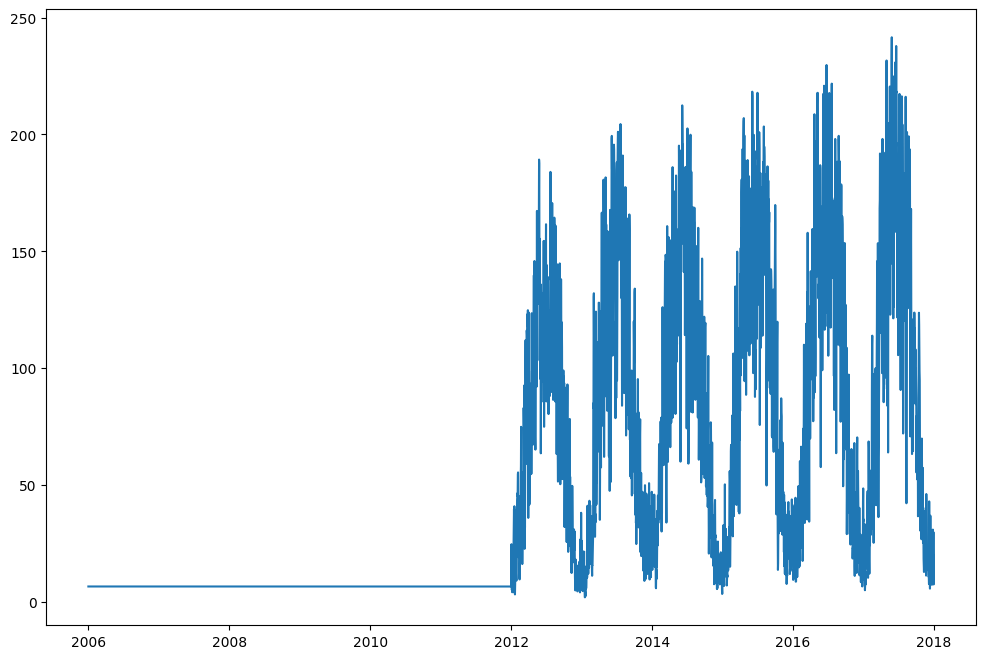

In [57]:
# Fill missing values and Plot Solar from 2006 onwards
plt.figure(figsize=(12,8))
df['Solar_filled'] = df['Solar'].bfill()
plt.plot(df.loc['2006':]['Solar_filled'], label='Solar')
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [65]:
# Correlation between consumption and overall production
correlation_prod = df[['Wind+Solar', 'Consumption']].corr().iloc[0, 1]
print(correlation_prod)

0.027647843859237447


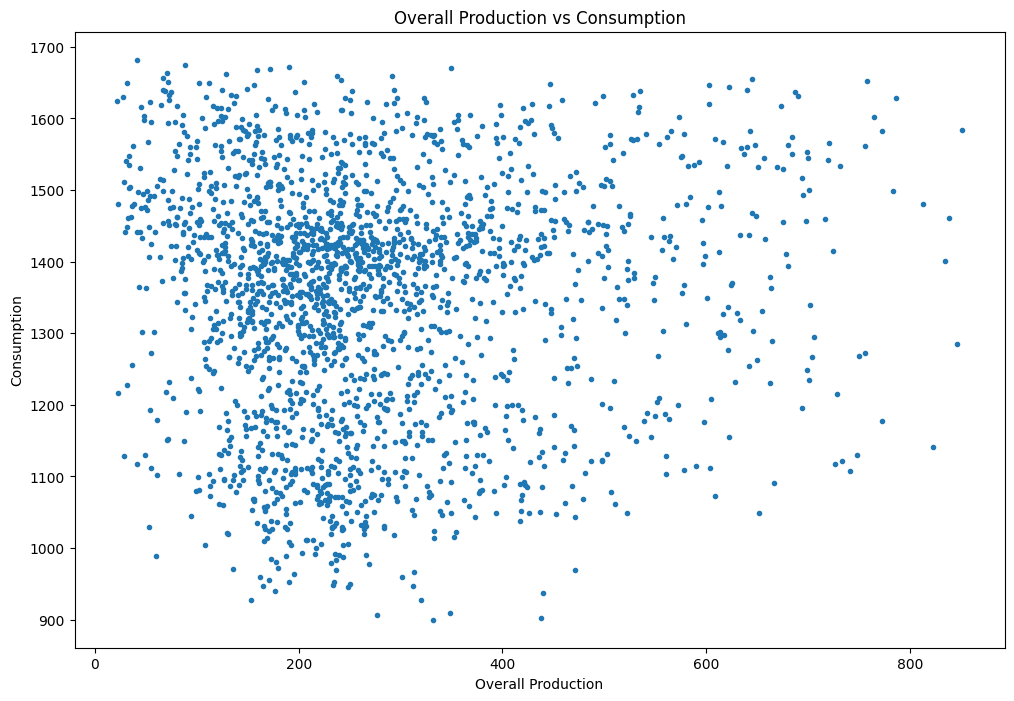

In [73]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(df['Wind+Solar'], df['Consumption'], marker='.')
plt.title('Overall Production vs Consumption')
plt.xlabel('Overall Production')
plt.ylabel('Consumption')
plt.show()

In [69]:
# Correlation between solar production and wind production
correlation_wind_solar = df[['Wind', 'Solar']].corr().iloc[0, 1]
print(correlation_wind_solar)

-0.3088318295977332


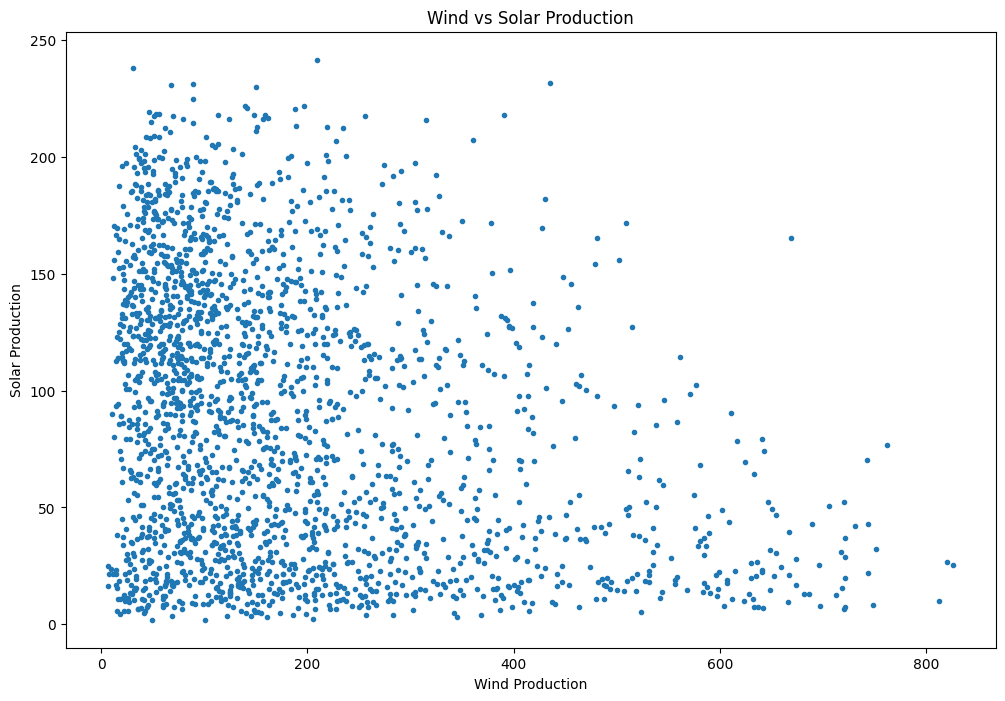

In [74]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(df['Wind'], df['Solar'], marker='.')
plt.title('Wind vs Solar Production')
plt.xlabel('Wind Production')
plt.ylabel('Solar Production')
plt.show()

In [75]:
# Correlation between consumption and wind production
corrrelation_wind_consumption = df[['Wind', 'Consumption']].corr().iloc[0, 1]
print(corrrelation_wind_consumption)

0.13682075809766234


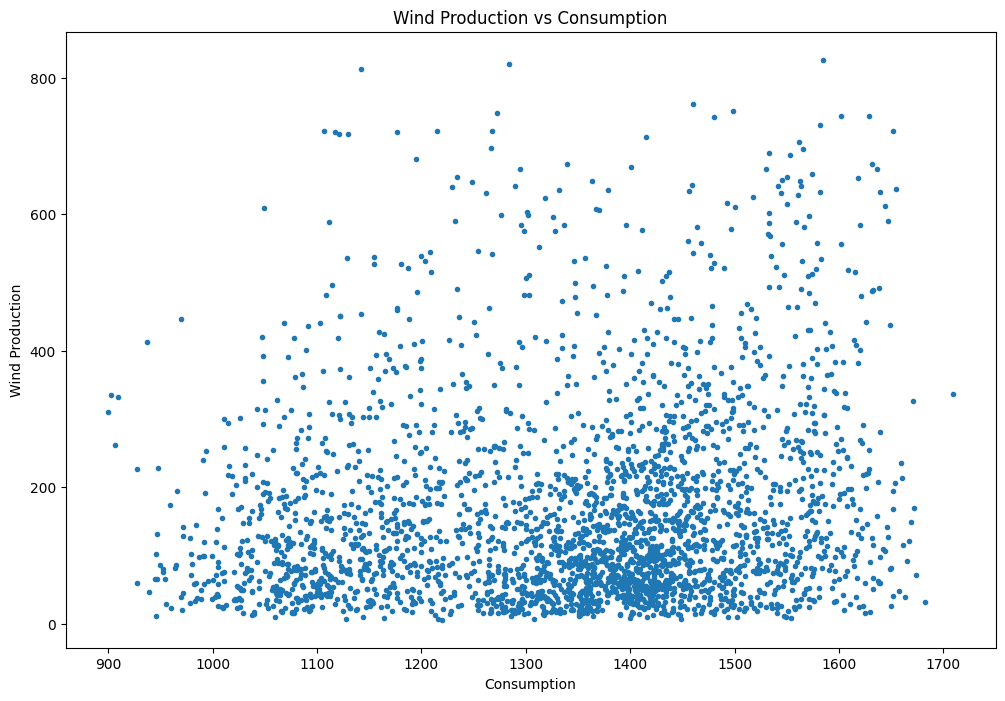

In [78]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(df['Consumption'], df['Wind'], marker='.')
plt.title('Wind Production vs Consumption')
plt.xlabel('Consumption')
plt.ylabel('Wind Production')
plt.show()

In [79]:
# Correlation between consumption and solar production
correlation_solar_consumption = df[['Solar', 'Consumption']].corr().iloc[0, 1]
print(correlation_solar_consumption)

-0.2789426551991449


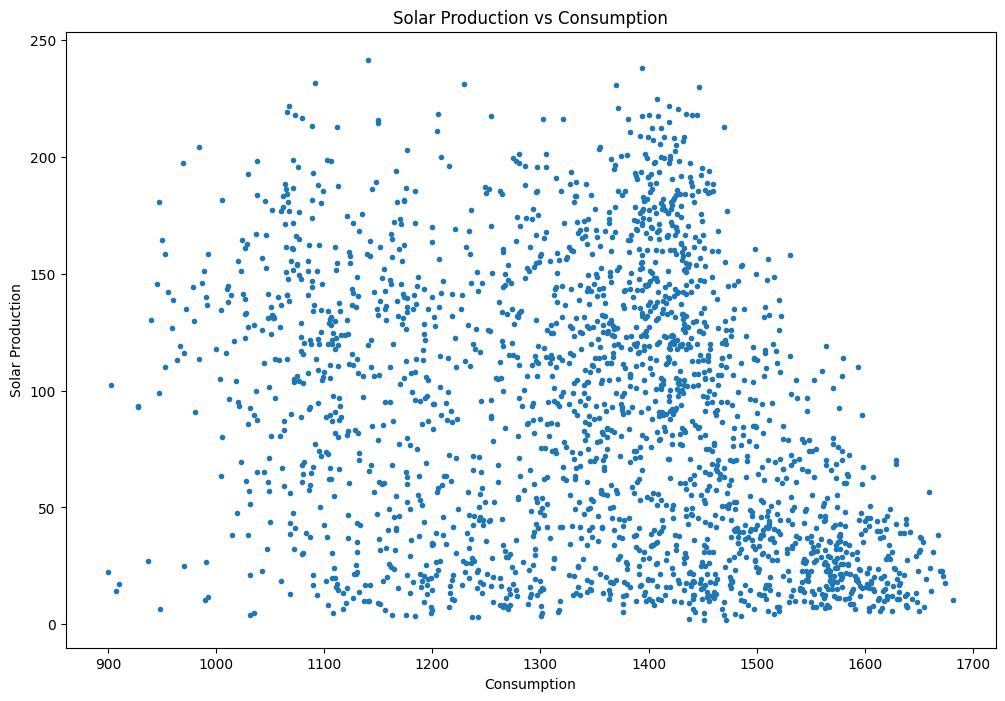

In [80]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(df['Consumption'], df['Solar'], marker='.')
plt.title('Solar Production vs Consumption')
plt.xlabel('Consumption')
plt.ylabel('Solar Production')
plt.show()